## Import libraries

In [1]:
!pip install cufflinks plotly

In [2]:
!pip install chart-studio

In [3]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [4]:
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

D:\Anaconda3\lib\site-

## Importing dataset

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Conversion into 2d array
1) Take pixel values from both datasets and convert into 1d array
<br>
2) Reshape these array into 2d array

In [9]:
train_df_pixel = (train_df.iloc[:,1:].values).reshape(-1,28,28)
test_df_pixel = (test_df.iloc[:,:].values).reshape(-1,28,28)

In [10]:
tr_df_pixel = train_df_pixel
te_df_pixel = test_df_pixel

### Display anyone image from both the arrays

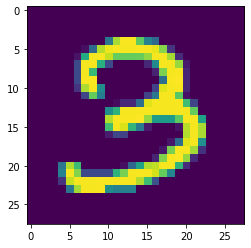

In [11]:
plt.imshow(tr_df_pixel[14])
plt.imsave('train_image_3.png', tr_df_pixel[14])

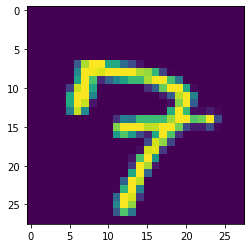

In [12]:
plt.imshow(test_df_pixel[5])
plt.imsave('test_image_7.png', test_df_pixel[5])

In [13]:
train_df_pixel = train_df_pixel.reshape(train_df_pixel.shape[0], train_df_pixel.shape[1], train_df_pixel.shape[2], 1)
test_df_pixel = test_df_pixel.reshape(test_df_pixel.shape[0], test_df_pixel.shape[1], test_df_pixel.shape[2], 1)

In [14]:
train_df_label = train_df.iloc[:,0:1].values

In [15]:
print(train_df_pixel.shape)
print(test_df_pixel.shape)
print(train_df_label.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)
(42000, 1)


## Building model

In [16]:
model = Sequential()

In [17]:
# Add convolution layer
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
# Add convolution layer
model.add(Convolution2D(32, (3,3), activation='relu'))

In [20]:
# Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
# Add Flatten layer
model.add(Flatten())

In [22]:
# Add first fully connected layer
model.add(Dense(kernel_initializer='uniform', activation='relu', units=100))

In [23]:
# Add output layer
model.add(Dense(kernel_initializer='uniform', activation='softmax', units=10))

## Compile model

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Summary of model

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

## fit model

In [26]:
history = model.fit(x=train_df_pixel, y=train_df_label, epochs=20, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 9s 262us/step - loss: 0.1711 - accuracy: 0.9482 - val_loss: 0.0689 - val_accuracy: 0.9787
Epoch 2/20
33600/33600 [==============================] - 6s 170us/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0658 - val_accuracy: 0.9818
Epoch 3/20
33600/33600 [==============================] - 5s 159us/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0602 - val_accuracy: 0.9811
Epoch 4/20
33600/33600 [==============================] - 6s 169us/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0802 - val_accuracy: 0.9802
Epoch 5/20
33600/33600 [==============================] - 6s 164us/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0631 - val_accuracy: 0.9848
Epoch 6/20
33600/33600 [==============================] - 5s 164us/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0697 - val_accuracy: 0.9840
Epoch 7/20
33600/33600 [==============================] - 6s 16

### Plotting accuracy vs validation accuracy

In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
df = {'accuracy':history.history['accuracy'],
      'val_accuracy':history.history['val_accuracy'],
      'loss':history.history['loss'],
      'val_loss':history.history['val_loss']}

In [29]:
df = pd.DataFrame(df)

In [30]:
df[['accuracy', 'val_accuracy']].iplot(xTitle = 'No. of epochs', yTitle = 'Accuracy')

In [31]:
df[['loss', 'val_loss']].iplot(xTitle = 'No. of epochs', yTitle = 'loss')

## Prediction on train set

In [32]:
train_pred = model.predict(train_df_pixel)

In [33]:
train_pred.shape

(42000, 10)

In [34]:
train_pred[0].sum()

1.0

In [35]:
train_pred

array([[1.2322957e-20, 1.0000000e+00, 1.9959125e-22, ..., 8.9152721e-25,
        1.5773082e-21, 3.4900875e-24],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.8189843e-34, 0.0000000e+00, 6.5849117e-30, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.4406238e-22, 4.6248353e-30, 9.8937139e-32, ..., 0.0000000e+00,
        0.0000000e+00, 1.0821823e-37],
       [5.7950462e-08, 1.5877985e-16, 2.0627723e-18, ..., 4.4552700e-14,
        3.8009951e-10, 1.0000000e+00]], dtype=float32)

### Creating array of predicted values
Storing the maximum value in each row of train_pred

In [36]:
train_pred_label=[]

In [37]:
for i in range(0, train_pred.shape[0]):
    train_pred_label.append(train_pred[i].argmax())

In [38]:
train_pred.shape

(42000, 10)

### accuracy on training set

In [39]:
accur = accuracy_score(train_pred_label, train_df_label)

In [40]:
accur

0.9939761904761905

### confusion matrix on training set

In [41]:
cm = confusion_matrix(train_pred_label, train_df_label)

In [42]:
cm

array([[4129,    0,    4,    2,    1,    1,    2,    2,   20,   23],
       [   0, 4675,    1,    1,    3,    2,    1,    5,    9,    1],
       [   1,    1, 4165,    1,    0,    0,    0,   13,    4,    1],
       [   0,    2,    4, 4342,    0,    4,    0,   17,    8,   32],
       [   0,    2,    0,    0, 4056,    0,    1,    1,    1,   11],
       [   0,    0,    0,    4,    0, 3785,    1,    0,    4,    6],
       [   1,    1,    1,    0,    7,    1, 4132,    0,    7,    0],
       [   0,    2,    1,    0,    1,    0,    0, 4363,    1,   17],
       [   1,    1,    1,    0,    0,    1,    0,    0, 4007,    4],
       [   0,    0,    0,    1,    4,    1,    0,    0,    2, 4093]],
      dtype=int64)

## Prediction on test set

In [43]:
test_pred = model.predict(test_df_pixel)

In [44]:
test_pred.shape

(28000, 10)

In [45]:
test_pred[0].sum()

1.0

In [46]:
test_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 6.5044452e-38,
        1.2745428e-31, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0573697e-26, 1.2429680e-31, 6.5456632e-31, ..., 4.6575352e-15,
        2.1303968e-25, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5298190e-18, 2.0312164e-18, 1.0530276e-22, ..., 1.2569265e-11,
        3.5293346e-19, 9.9999917e-01],
       [1.2530296e-35, 1.5432330e-38, 1.0000000e+00, ..., 2.0409466e-29,
        1.4670279e-25, 0.0000000e+00]], dtype=float32)

### Creating array of predicted values
Storing the maximum value in each row of test_pred

In [47]:
test_pred_label=[]

In [48]:
for i in range(0, test_pred.shape[0]):
    test_pred_label.append(test_pred[i].argmax())

In [49]:
test_pred_label

[2,
 0,
 9,
 0,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 3,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 2,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [50]:
len(test_pred_label)

28000

## Submission

In [51]:
dset = pd.DataFrame({'ImageId':np.arange(1, 28001), 'Label':test_pred_label})

In [52]:
dset.to_csv('Submit.csv', index=False)